In [1]:
import pandas as pd
import numpy as np

In [2]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/meddra_all_se.tsv.gz"

In [3]:
df = pd.read_csv(path_to_file,delimiter="\t", header=None)
df.rename(columns={0:'ID'}, inplace=True)

In [4]:
df3 = df.loc[df[5].isin(["Hypotension", "Hypertension","Hypoglycaemia", "Hyperglycaemia", "Blood pressure increased","Blood pressure decreased", "Blood glucose increased", "Blood glucose decreased", "Weight increased", "Weight decreased", "Hypocholesterolaemia", "Hypercholesterolaemia"])]
df3.head()
#finds all samples with one of the four traits that we have data for in the 55k exome sequence sample

,ID,1,2,3,4,5
67,CID100000085,CID000010917,C0020538,LLT,C0020538,Hypertension
68,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension
69,CID100000085,CID000010917,C0020649,LLT,C0020649,Hypotension
70,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension
111,CID100000085,CID000010917,C0043094,LLT,C0043094,Weight increased


In [5]:
df3.loc[df3['ID'].isin(["CID100005470"])].head() #CID100005470 is the 'CID' identification number for tibolone to check whether sample is same from dataset with/without frequency
#Since this 'CID' ID doesn't exist in the other dataset, we see that the datasets are different and thus the genes analyzed when using each dataset is different

,ID,1,2,3,4,5
170435,CID100005470,CID000021844,C0043094,LLT,C0043094,Weight increased
170436,CID100005470,CID000021844,C0043094,PT,C0043094,Weight increased
170536,CID100005470,CID000444008,C0043094,LLT,C0043094,Weight increased
170537,CID100005470,CID000444008,C0043094,PT,C0043094,Weight increased


In [6]:
df.loc[df[5].isin(["Hypoglycaemia"])].head()

,ID,1,2,3,4,5
1372,CID100000214,CID005280723,C0020615,LLT,C0020615,Hypoglycaemia
1373,CID100000214,CID005280723,C0020615,PT,C0020615,Hypoglycaemia
1665,CID100000214,CID006433212,C0020615,LLT,C0020615,Hypoglycaemia
1666,CID100000214,CID006433212,C0020615,PT,C0020615,Hypoglycaemia
2612,CID100000444,CID000000444,C0020615,LLT,C0020615,Hypoglycaemia


In [7]:
df4 = df3.loc[df[3].isin(["PT"])]
df4.head()

,ID,1,2,3,4,5
68,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension
70,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension
112,CID100000085,CID000010917,C0043094,PT,C0043094,Weight increased
114,CID100000085,CID000010917,C0043096,PT,C0043096,Weight decreased
197,CID100000137,CID000000137,C0020649,PT,C0020649,Hypotension


In [8]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/drug_names.tsv"
df5 = pd.read_csv(path_to_file,delimiter="\t", header=None)
df5.rename(columns={0:'ID'}, inplace=True)
df5.rename(columns={1:'drug_name'}, inplace=True)
#drug names file

In [9]:
df5.head(10)

,ID,drug_name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate
5,CID100000158,PGE2
6,CID100000159,prostacyclin
7,CID100000160,prostaglandin
8,CID100000175,acetate
9,CID100000187,acetylcholine


In [10]:
df6 = pd.merge(df4, df5, on='ID', how='outer')
df6.rename(columns={3:'PT'}, inplace=True)
df6.head()

,ID,1,2,PT,4,5,drug_name
0,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension,carnitine
1,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension,carnitine
2,CID100000085,CID000010917,C0043094,PT,C0043094,Weight increased,carnitine
3,CID100000085,CID000010917,C0043096,PT,C0043096,Weight decreased,carnitine
4,CID100000137,CID000000137,C0020649,PT,C0020649,Hypotension,5-aminolevulinic


In [11]:
# This contains all attributes
df7 = df6[df6.PT.str.contains("NaN") == False]
df7.head()
df7.loc[df7['drug_name'].isin(["alprazolam"])].head()

,ID,1,2,PT,4,5,drug_name
155,CID100002118,CID000002118,C0020649,PT,C0020649,Hypotension,alprazolam
156,CID100002118,CID000002118,C0043094,PT,C0043094,Weight increased,alprazolam
157,CID100002118,CID000002118,C0043096,PT,C0043096,Weight decreased,alprazolam


In [12]:
df7.loc[df7[5].isin(["Blood glucose decreased"])].head()

,ID,1,2,PT,4,5,drug_name
252,CID100002441,CID000002441,C0595883,PT,C0595883,Blood glucose decreased,bromazepam
391,CID100002764,CID000002764,C0595883,PT,C0595883,Blood glucose decreased,ciprofloxacin
457,CID100002907,CID000002907,C0595883,PT,C0595883,Blood glucose decreased,cyclophosphamide
746,CID100003454,CID000003454,C0595883,PT,C0595883,Blood glucose decreased,ganciclovir
1213,CID100004583,CID000149096,C0860801,PT,C0595883,Blood glucose decreased,ofloxacin


In [13]:
import xml.etree.ElementTree as ET
import lxml.html
import numpy as np
import pandas as pd

In [14]:
path_to_file = '/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/drugbank_full_database.xml'

In [15]:
tree = ET.parse(path_to_file) #parses xml file

In [16]:
def get_id_and_name_from_target(target):
    id = target.find("{http://www.drugbank.ca}id").text
    name = target.find("{http://www.drugbank.ca}name").text
    gene = target.find("*{http://www.drugbank.ca}gene-name")
    if gene is None:
        gene_found = None
    else:
        gene_found= gene.text
    return id, name, gene_found

In [17]:
all_drugs = tree.findall("{http://www.drugbank.ca}drug")

In [18]:
new_results = []
total_found = 0
for drug in all_drugs:
    drug_name = drug.find("{http://www.drugbank.ca}name").text
    drug_id = drug.find("{http://www.drugbank.ca}drugbank-id[@primary]").text
    element_containing_all_targets = drug.find("{http://www.drugbank.ca}targets")
    list_of_targets = element_containing_all_targets.findall("{http://www.drugbank.ca}target")
    for target in list_of_targets:
        target_id, target_name, target_gene = get_id_and_name_from_target(target)
        new_results.append([drug_name, drug_id, target_id, target_name, target_gene])
    total_found += 1

In [19]:
drug = all_drugs[0]
element_containing_all_targets = drug.find("{http://www.drugbank.ca}targets")
list_of_targets = element_containing_all_targets.findall("{http://www.drugbank.ca}target")
target = list_of_targets[0]

In [20]:
%%bash
head -n 2500 /users/aditgupta/Google\ Drive/Research/T2D/Summer_2018/drugbank_full_database.xml | tail -n 100 > output.txt

In [21]:
df = pd.DataFrame(new_results)

In [22]:
df.columns = ["drug_name", "drug_id", "target_id", "target_name", "target_gene"]

In [23]:
df.head()

,drug_name,drug_id,target_id,target_name,target_gene
0,Lepirudin,DB00001,BE0000048,Prothrombin,F2
1,Cetuximab,DB00002,BE0000767,Epidermal growth factor receptor,EGFR
2,Cetuximab,DB00002,BE0000901,Low affinity immunoglobulin gamma Fc region re...,FCGR3B
3,Cetuximab,DB00002,BE0002093,Complement C1r subcomponent,C1R
4,Cetuximab,DB00002,BE0002094,Complement C1q subcomponent subunit A,C1QA


In [24]:
df["drug_name"] = df["drug_name"].str.lower()

In [25]:
indexed_df = df.set_index("drug_name")

In [26]:
indexed_df.head()

,drug_id,target_id,target_name,target_gene
drug_name,,,,
lepirudin,DB00001,BE0000048,Prothrombin,F2
cetuximab,DB00002,BE0000767,Epidermal growth factor receptor,EGFR
cetuximab,DB00002,BE0000901,Low affinity immunoglobulin gamma Fc region re...,FCGR3B
cetuximab,DB00002,BE0002093,Complement C1r subcomponent,C1R
cetuximab,DB00002,BE0002094,Complement C1q subcomponent subunit A,C1QA


In [27]:
indexed_df.ix[df7["drug_name"]].head(10)

/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,drug_id,target_id,target_name,target_gene
drug_name,,,,
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
5-aminolevulinic,NaN,NaN,NaN,NaN
PGE2,NaN,NaN,NaN,NaN
PGE2,NaN,NaN,NaN,NaN
prostacyclin,NaN,NaN,NaN,NaN
prostacyclin,NaN,NaN,NaN,NaN


In [28]:
target_lookup_table = indexed_df.ix[df7["drug_name"]].dropna().groupby("drug_name")[["target_id", "target_name"]].agg(list)

/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [29]:
target_lookup_table.head()

,target_id,target_name
drug_name,,
abacavir,"[BE0004136, BE0009142, BE0004136, BE0009142, B...","[Reverse transcriptase/RNaseH, HLA class I his..."
abiraterone,"[BE0000344, BE0000344, BE0000344]","[Steroid 17-alpha-hydroxylase/17,20 lyase, Ste..."
acamprosate,"[BE0004797, BE0004852, BE0001192, BE0004797, B...","[GABA-A receptor (anion channel), Glutamate (N..."
acebutolol,"[BE0000172, BE0000694, BE0000172, BE0000694]","[Beta-1 adrenergic receptor, Beta-2 adrenergic..."
acetaminophen,"[BE0000262, BE0000017, BE0002194, BE0001023, B...","[Prostaglandin G/H synthase 2, Prostaglandin G..."


In [30]:
df7 = df7.rename(columns={"DrugName":'drug_name'}, inplace=False)

In [31]:
df26 = df7["drug_name"].unique() #all drugs that are yield one of the traits
len(df26)

973

In [32]:
df8 = pd.merge(df7, target_lookup_table, on='drug_name', how='outer')
# contains all drug names, frequencies, side effects, target ids, target names
df8.head()

,ID,1,2,PT,4,5,drug_name,target_id,target_name
0,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension,carnitine,NaN,NaN
1,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension,carnitine,NaN,NaN
2,CID100000085,CID000010917,C0043094,PT,C0043094,Weight increased,carnitine,NaN,NaN
3,CID100000085,CID000010917,C0043096,PT,C0043096,Weight decreased,carnitine,NaN,NaN
4,CID100000137,CID000000137,C0020649,PT,C0020649,Hypotension,5-aminolevulinic,NaN,NaN


In [33]:
df.loc[df["drug_name"].isin(["estradiol"])]
#use df to find target id and name for each drug (all info in seperate rows)
#use df8 to combine all targets and ids into same row for a particular drug (all info in one row)

,drug_name,drug_id,target_id,target_name,target_gene
3699,estradiol,DB00783,BE0000123,Estrogen receptor alpha,ESR1
3700,estradiol,DB00783,BE0000792,Estrogen receptor beta,ESR2
3701,estradiol,DB00783,BE0000956,Nuclear receptor subfamily 1 group I member 2,NR1I2
3702,estradiol,DB00783,BE0000849,Neuronal acetylcholine receptor subunit alpha-4,CHRNA4
3703,estradiol,DB00783,BE0003740,Nuclear receptor coactivator 2,NCOA2
3704,estradiol,DB00783,BE0003446,G-protein coupled estrogen receptor 1,GPER1
3705,estradiol,DB00783,BE0009014,ATP synthase subunit a,MT-ATP6
3706,estradiol,DB00783,BE0009015,Beclin-1,BECN1
3707,estradiol,DB00783,BE0000006,Estradiol 17-beta-dehydrogenase 2,HSD17B2
3708,estradiol,DB00783,BE0002088,Estrogen-related receptor gamma,ESRRG


In [34]:
df.loc[df["drug_name"].isin(["bupropion"])]

,drug_name,drug_id,target_id,target_name,target_gene
5046,bupropion,DB01156,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
5047,bupropion,DB01156,BE0000486,Sodium-dependent noradrenaline transporter,SLC6A2
5048,bupropion,DB01156,BE0003585,Neuronal acetylcholine receptor subunit alpha-3,CHRNA3


In [35]:
df8.loc[df8["drug_name"].isin(["carnitine"])]
#Smoothened homolog

,ID,1,2,PT,4,5,drug_name,target_id,target_name
0,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension,carnitine,NaN,NaN
1,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension,carnitine,NaN,NaN
2,CID100000085,CID000010917,C0043094,PT,C0043094,Weight increased,carnitine,NaN,NaN
3,CID100000085,CID000010917,C0043096,PT,C0043096,Weight decreased,carnitine,NaN,NaN


In [36]:
df.loc[df["target_name"].isin(["Sodium-dependent dopamine transporter"])].head()

,drug_name,drug_id,target_id,target_name,target_gene
1299,amphetamine,DB00182,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1335,phentermine,DB00191,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1544,benzatropine,DB00245,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1734,venlafaxine,DB00285,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1741,atomoxetine,DB00289,BE0000647,Sodium-dependent dopamine transporter,SLC6A3


In [37]:
df8.loc[df8["drug_name"].isin(["bupropion"])]

,ID,1,2,PT,4,5,drug_name,target_id,target_name
28,CID100000444,CID000000444,C0020443,PT,C0020443,Hypercholesterolaemia,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."
29,CID100000444,CID000000444,C0020456,PT,C0020456,Hyperglycaemia,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."
30,CID100000444,CID000000444,C0020538,PT,C0020538,Hypertension,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."
31,CID100000444,CID000000444,C0020615,PT,C0020615,Hypoglycaemia,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."
32,CID100000444,CID000000444,C0020649,PT,C0020649,Hypotension,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."
33,CID100000444,CID000000444,C0043094,PT,C0043094,Weight increased,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."
34,CID100000444,CID000000444,C0043096,PT,C0043096,Weight decreased,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."
35,CID100000444,CID000000444,C0497247,PT,C0497247,Blood pressure increased,bupropion,"[BE0000647, BE0000486, BE0003585, BE0000647, B...","[Sodium-dependent dopamine transporter, Sodium..."


In [38]:
df.loc[df["drug_name"].isin(["ethionamide"])]

,drug_name,drug_id,target_id,target_name,target_gene
3070,ethionamide,DB00609,BE0000332,Enoyl-[acyl-carrier-protein] reductase [NADH],inhA
3071,ethionamide,DB00609,BE0000466,Catalase-peroxidase,katG


In [39]:
df11 = df['drug_name'].value_counts() #df11 is a series with number of targets given a drug
df12 = df11.to_frame(name=None)
df13 = df12.reset_index()
df14 = df13.rename(columns={'drug_name':'number_of_targets'}, inplace=False)

In [40]:
df15 = df14.rename(columns={'index':'drug_name'}, inplace=False)
df15.head()
#df15 is the number of targets given a drug

,drug_name,number_of_targets
0,fostamatinib,300
1,artenimol,192
2,copper,147
3,nadh,144
4,zinc,124


In [41]:
df15.loc[df15['drug_name'].isin(["ethionamide"])]

,drug_name,number_of_targets
2670,ethionamide,2


In [42]:
target_freq = df['target_id'].value_counts() #number of drugs that target a given target ID in a series
df17 = target_freq.to_frame(name=None)
df18 = df17.reset_index()
df19 = df18.rename(columns={'target_id':'target_freq'}, inplace=False)
df20 = df19.rename(columns={'index':'target_id'}, inplace=False)
df20.head(10)
#df20 shows the total number of drugs that target a given target ID in a dataframe

,target_id,target_freq
0,BE0001072,137
1,BE0000048,112
2,BE0000123,111
3,BE0000756,108
4,BE0000451,105
5,BE0000442,104
6,BE0004796,101
7,BE0000322,100
8,BE0001739,99
9,BE0000092,97


In [43]:
df20.loc[df20['target_id'].isin(["BE0000901"])]

,target_id,target_freq
123,BE0000901,21


In [44]:
import matplotlib.pyplot as plt
hist_plot = df15['number_of_targets'].hist(bins=15,grid=False, figsize=(10,8))
hist_plot.set_xlabel('Number of Targets')
hist_plot.set_ylabel('Frequency (of Drugs)')
hist_plot.set_title('Histogram of the Number of Targets with respect to Frequency of Given Drugs')
hist_plot.set_xlim(0,300)
#This histogram shows a plot of the frequency of drugs and its respective target number
#Most drugs fall in the first bin which have at most 2 targets 

(0, 300)

In [45]:
df10 = df15[(df15['number_of_targets'])<3]  
df10.head()
#all drugs that have a maximum of two targets

,drug_name,number_of_targets
1508,n-[(1s)-2-amino-1-phenylethyl]-5-(1h-pyrrolo[2...,2
1509,atiprimod,2
1510,hyaluronidase,2
1511,dicyclomine,2
1512,"alpha-(2,6-dichlorophenyl)-alpha-(2-acetyl-5-m...",2


In [46]:
df21 = df20[(df20['target_freq'])>1]  #all targets that have at least two drugs targeting it
df21.head(15)


,target_id,target_freq
0,BE0001072,137
1,BE0000048,112
2,BE0000123,111
3,BE0000756,108
4,BE0000451,105
5,BE0000442,104
6,BE0004796,101
7,BE0000322,100
8,BE0001739,99
9,BE0000092,97


In [47]:
df21.loc[df21['target_id'].isin(["BE0000466"])]

,target_id,target_freq
2118,BE0000466,2


(0, 140)

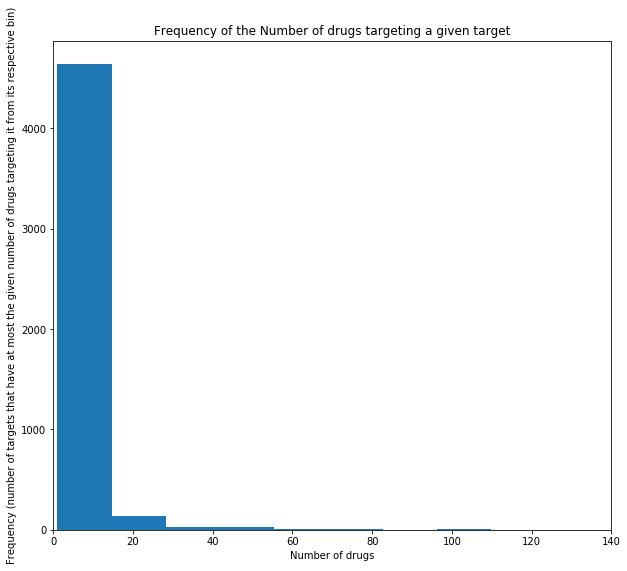

In [48]:
hist_plot_target = df20['target_freq'].hist(bins=10,grid=False, figsize=(10,9))
hist_plot_target.set_xlabel('Number of drugs')
hist_plot_target.set_ylabel('Frequency (number of targets that have at most the given number of drugs targeting it from its respective bin)')
hist_plot_target.set_title('Frequency of the Number of drugs targeting a given target')
hist_plot_target.set_xlim(0,140)
#contains the target frequncies that have x (x-axis) number of drugs

In [49]:
df16 = pd.merge(df8, df10, on='drug_name', how='inner')
df16.head(15) #df16 is a dataframe that includes all drugs integrated with df10. 
#Only includes drugs that have a maximum of two targets
df17 = df16
df17.head()

,ID,1,2,PT,4,5,drug_name,target_id,target_name,number_of_targets
0,CID100000596,CID000006252,C0020456,PT,C0020456,Hyperglycaemia,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
1,CID100000596,CID000006252,C0020538,PT,C0020538,Hypertension,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
2,CID100000596,CID000006252,C0020649,PT,C0020649,Hypotension,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
3,CID100000596,CID000006252,C0043094,PT,C0043094,Weight increased,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
4,CID100000813,CID000000813,C0020649,PT,C0020649,Hypotension,potassium,"[BE0000732, BE0000732, BE0000732]",[Sodium/potassium-transporting ATPase subunit ...,1


In [50]:
df16.head()


,ID,1,2,PT,4,5,drug_name,target_id,target_name,number_of_targets
0,CID100000596,CID000006252,C0020456,PT,C0020456,Hyperglycaemia,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
1,CID100000596,CID000006252,C0020538,PT,C0020538,Hypertension,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
2,CID100000596,CID000006252,C0020649,PT,C0020649,Hypotension,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
3,CID100000596,CID000006252,C0043094,PT,C0043094,Weight increased,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...",2
4,CID100000813,CID000000813,C0020649,PT,C0020649,Hypotension,potassium,"[BE0000732, BE0000732, BE0000732]",[Sodium/potassium-transporting ATPase subunit ...,1


In [51]:
res = df16.set_index(['ID',1,2,'PT', 4,5, 'drug_name','number_of_targets', ])['target_id'].apply(pd.Series).stack()
res2 = res.reset_index()
res2.columns = ['ID',1,2,'PT', 4,5, 'drug_name','number_of_targets','sample_num','target_id']
res3 = res2
df27 = res3.drop_duplicates(subset = ['ID', 1, 2, 5,'drug_name', 'target_id'])
df27.head()

,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_id
0,CID100000596,CID000006252,C0020456,PT,C0020456,Hyperglycaemia,cytarabine,2,0,BE0000113
4,CID100000596,CID000006252,C0020538,PT,C0020538,Hypertension,cytarabine,2,0,BE0000113
8,CID100000596,CID000006252,C0020649,PT,C0020649,Hypotension,cytarabine,2,0,BE0000113
12,CID100000596,CID000006252,C0043094,PT,C0043094,Weight increased,cytarabine,2,0,BE0000113
16,CID100000813,CID000000813,C0020649,PT,C0020649,Hypotension,potassium,1,0,BE0000732


In [52]:
df28 = pd.merge(df21, df27, on='target_id', how='outer')
df28.head()

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num
0,BE0001072,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0
2,BE0000123,111.0,CID100005470,CID000021844,C0043094,PT,C0043094,Weight increased,tibolone,1.0,0.0
3,BE0000123,111.0,CID100005470,CID000444008,C0043094,PT,C0043094,Weight increased,tibolone,1.0,0.0
4,BE0000123,111.0,CID100005516,CID003005572,C0043094,PT,C0043094,Weight increased,toremifene,2.0,0.0


In [53]:
df29 = df28.dropna(axis=0)
df29.head()
#df29 contains all drugs that have at most two targets and all targets that have at least two drugs targeting it

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0
2,BE0000123,111.0,CID100005470,CID000021844,C0043094,PT,C0043094,Weight increased,tibolone,1.0,0.0
3,BE0000123,111.0,CID100005470,CID000444008,C0043094,PT,C0043094,Weight increased,tibolone,1.0,0.0
4,BE0000123,111.0,CID100005516,CID003005572,C0043094,PT,C0043094,Weight increased,toremifene,2.0,0.0
5,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0


In [54]:
df29['drug_name'].unique()

array(['argatroban', 'tibolone', 'toremifene', 'desogestrel', 'buspirone',
       'domperidone', 'droperidol', 'prochlorperazine', 'tetrabenazine',
       'cyclobenzaprine', 'donepezil', 'azelastine', 'carbinoxamine',
       'cetirizine', 'clemastine', 'diphenhydramine', 'hydroxyzine',
       'ketotifen', 'loratadine', 'cyclizine', 'furosemide', 'cevimeline',
       'dicyclomine', 'trospium', 'ergonovine', 'naphazoline',
       'flurbiprofen', 'ketorolac', 'meloxicam', 'nabumetone',
       'oxaprozin', 'rofecoxib', 'salsalate', 'tolmetin', 'parecoxib',
       'etoricoxib', 'nepafenac', 'piroxicam', 'methacholine',
       'guanfacine', 'methyldopa', 'moxonidine', 'dexmedetomidine',
       'bicalutamide', 'nilutamide', 'glipizide', 'nateglinide',
       'repaglinide', 'telmisartan', 'acebutolol', 'atenolol',
       'betaxolol', 'bisoprolol', 'carteolol', 'levobunolol',
       'metoprolol', 'nadolol', 'pirbuterol', 'metipranolol', 'nebivolol',
       'indacaterol', 'protriptyline', 'dieth

In [55]:
len(df29['drug_name'].unique()) #There are 204 unique drugs that have at least two targets and fit 
#the criteria that a target must have at least two drugs targeting it

331

In [56]:
df34 = df21.drop('target_freq', axis=1)
df34.head()
#

,target_id
0,BE0001072
1,BE0000048
2,BE0000123
3,BE0000756
4,BE0000451


In [57]:
df35 = pd.merge(df34, indexed_df, on='target_id', how='outer')
df36 = df35.drop('drug_id', axis=1)
df37 = df36.drop_duplicates()
df37.head()
#a dataframe with target_id, target_name, and the target_gene


,target_id,target_name,target_gene
0,BE0001072,Cyclin-dependent kinase 2,CDK2
137,BE0000048,Prothrombin,F2
249,BE0000123,Estrogen receptor alpha,ESR1
360,BE0000756,D(2) dopamine receptor,DRD2
468,BE0000451,5-hydroxytryptamine receptor 2A,HTR2A


In [58]:
df38 = pd.merge(df29, df37, on='target_id', how='outer')
df39 = df38.dropna(axis=0)
df39.head()
#df39 shows the same data as df39 but also includes the names of drug targets. 
#Includes all samples (drugs and targets) where drugs have at least two targets
#and targets have at least two drugs targeting it

#genes --> HTR2A, ESR1, DRD2, ...


,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000123,111.0,CID100005470,CID000021844,C0043094,PT,C0043094,Weight increased,tibolone,1.0,0.0,Estrogen receptor alpha,ESR1
2,BE0000123,111.0,CID100005470,CID000444008,C0043094,PT,C0043094,Weight increased,tibolone,1.0,0.0,Estrogen receptor alpha,ESR1
3,BE0000123,111.0,CID100005516,CID003005572,C0043094,PT,C0043094,Weight increased,toremifene,2.0,0.0,Estrogen receptor alpha,ESR1
4,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1


In [59]:
df39.loc[df39['target_gene'].isin(["katG"])]

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
1391,BE0000466,2.0,CID102761171,CID002761171,C0020615,PT,C0020615,Hypoglycaemia,ethionamide,2.0,1.0,Catalase-peroxidase,katG
1392,BE0000466,2.0,CID102761171,CID002761171,C0043096,PT,C0043096,Weight decreased,ethionamide,2.0,1.0,Catalase-peroxidase,katG


In [60]:
df39['target_id'].unique()

array(['BE0000048', 'BE0000123', 'BE0000756', 'BE0000451', 'BE0000442',
       'BE0000322', 'BE0000092', 'BE0000501', 'BE0000291', 'BE0000560',
       'BE0000262', 'BE0000017', 'BE0000045', 'BE0000289', 'BE0000132',
       'BE0000215', 'BE0000694', 'BE0000486', 'BE0000533', 'BE0000749',
       'BE0000956', 'BE0000575', 'BE0000795', 'BE0000172', 'BE0000216',
       'BE0000770', 'BE0000426', 'BE0000854', 'BE0000794', 'BE0000572',
       'BE0000020', 'BE0000647', 'BE0000581', 'BE0000090', 'BE0002050',
       'BE0000071', 'BE0004797', 'BE0001594', 'BE0000420', 'BE0000311',
       'BE0000742', 'BE0000797', 'BE0000557', 'BE0002196', 'BE0000393',
       'BE0000197', 'BE0000659', 'BE0000330', 'BE0002180', 'BE0000767',
       'BE0000267', 'BE0000487', 'BE0002345', 'BE0002198', 'BE0000738',
       'BE0000685', 'BE0001012', 'BE0000118', 'BE0000324', 'BE0000779',
       'BE0000250', 'BE0000221', 'BE0000576', 'BE0000270', 'BE0000329',
       'BE0002346', 'BE0004643', 'BE0000668', 'BE0000641', 'BE00

In [61]:
import numpy as np
np.set_printoptions(threshold=np.inf)
df40 = df39
df41 = df40.drop_duplicates(subset = ['target_name','target_freq', 5,'drug_name', 'target_id', 'target_gene', 'number_of_targets'])
df41.head(20)
#df41 is the final atrtribute list. It includes all data and all attribtues that fits under our criteria


,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000123,111.0,CID100005470,CID000021844,C0043094,PT,C0043094,Weight increased,tibolone,1.0,0.0,Estrogen receptor alpha,ESR1
3,BE0000123,111.0,CID100005516,CID003005572,C0043094,PT,C0043094,Weight increased,toremifene,2.0,0.0,Estrogen receptor alpha,ESR1
4,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1
5,BE0000123,111.0,CID100040973,CID000040973,C0043094,PT,C0043094,Weight increased,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1
6,BE0000123,111.0,CID100040973,CID000040973,C0043096,PT,C0043096,Weight decreased,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1
7,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,C0020538,Hypertension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
8,BE0000756,108.0,CID100002477,CID000002477,C0020649,PT,C0020649,Hypotension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
9,BE0000756,108.0,CID100002477,CID000002477,C0043094,PT,C0043094,Weight increased,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
10,BE0000756,108.0,CID100002477,CID000002477,C0043096,PT,C0043096,Weight decreased,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2


In [62]:
gene_analysis = df41['target_gene'].unique()
gene_analysis

array(['F2', 'ESR1', 'DRD2', 'HTR2A', 'HRH1', 'CA2', 'CHRM1', 'ADRA1A',
       'HTR1A', 'CHRM2', 'PTGS2', 'PTGS1', 'CHRM3', 'ADRA2A', 'AR',
       'PPARG', 'ADRB2', 'SLC6A2', 'HTR2C', 'SLC6A4', 'NR1I2', 'ADRA1B',
       'GABRA1', 'ADRB1', 'F10', 'OPRM1', 'ACHE', 'DPP4', 'NR3C1',
       'ADRA2B', 'DRD1', 'SLC6A3', 'DRD3', 'KCNH2', 'gag-pol', 'PPARA',
       'OPRD1', 'HTR3A', 'TOP2A', 'HTR1B', 'PGR', 'MAOB', 'HTR2B',
       'SCN5A', 'HTR1D', 'DHFR', 'BCHE', 'EGFR', 'CA1', 'PDE4B', 'GABRB3',
       'MAOA', 'CHRNA2', 'SHBG', 'ADRB3', 'SLC18A2', 'TYMS', 'VDR', 'PNP',
       'ACE', 'pbpA', 'REN', 'HSD11B1', 'GABRB2', 'pbp3', 'NR3C2',
       'GRIN3A', 'AHR', 'ADORA2A', 'ATP1A1', 'ABL1', 'gyrA', 'VEGFA',
       'KIT', 'pol', 'penA', 'TRPV1', 'PDE5A', 'FKBP1A', 'SCN10A',
       'GNRHR', 'HMGCR', 'parC', 'ADA', 'camC', 'AGTR1', 'TUBB',
       'SERPINC1', 'TOP1', 'EDNRA', 'ftsI', 'MET', 'BCL2', 'ERG11',
       'GRIA1', 'CFTR', 'inhA', 'CNR1', 'rpsL', 'FDPS', 'CYP19A1', 'TSPO',
       'TUBB1', 'TA

In [94]:
df42 = df41.loc[df41[5].isin(["Hyperglycaemia","Blood glucose increased"])]
gene_analysis = df42['target_gene'].unique()

In [95]:
df42['target_gene'].unique()

array(['DRD2', 'HTR2A', 'CA2', 'CHRM1', 'ADRA1A', 'PTGS2', 'PTGS1',
       'CHRM3', 'ADRA2A', 'AR', 'PPARG', 'ADRB2', 'SLC6A2', 'SLC6A4',
       'NR1I2', 'ADRA1B', 'GABRA1', 'ADRB1', 'ACHE', 'DPP4', 'NR3C1',
       'SLC6A3', 'KCNH2', 'gag-pol', 'HTR3A', 'TOP2A', 'HTR1B', 'SCN5A',
       'HTR1D', 'BCHE', 'PNP', 'ACE', 'pbpA', 'HSD11B1', 'NR3C2', 'ABL1',
       'gyrA', 'VEGFA', 'KIT', 'pol', 'penA', 'PDE5A', 'FKBP1A', 'SCN10A',
       'GNRHR', 'parC', 'AGTR1', 'TUBB', 'EDNRA', 'ftsI', 'BCL2', 'ERG11',
       'CFTR', 'rpsL', 'TSPO', 'TUBB1', 'TACR1', 'PDE3A', 'COMT',
       'SLC12A1', 'ABCC8', 'SLC12A3', 'MAP2K1', 'GABBR1', 'XDH', 'MTOR',
       'AVPR1A', 'TUBA4A', 'AVPR2', 'EDNRB', 'CACNG1', 'LTF', 'SSTR2',
       'SSTR5', 'ATP4A', 'TLR7', 'CYP51A1', 'GABBR2', 'NS3/4A', 'CACNA1A',
       'MAP2K2', 'SMO', 'JUN', 'rpoB', 'POLA1', 'MAPT', 'POLB', 'PSMB5',
       'TRDMT1', 'frdA', 'CYP17A1', 'PSMB1', 'GHRHR', 'TLR8', 'SLC6A1',
       'UL54'], dtype=object)

In [97]:
string_to_write = "\n".join(gene_analysis)
with open("analysis_gene5.txt", "w") as f:
    f.write(string_to_write)